In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [70]:
def f(x,y):
    return (y - 36)**2 + (x + 49)**2

In [71]:
def df_dx(x,y) :
    return 2*(x + 49)

def df_dy(x,y) :
    return 2*(y - 36)

In [72]:
def L2Norm(x,y) :
    grad_x = df_dx(x,y);
    grad_y = df_dy(x,y);
    return np.sqrt(grad_x**2 + grad_y**2)

def tolerance(p) :
    return 10 ** (-1*p)

In [73]:
def gradient_descent(x_start , y_start ) :
    tablelist=[]
    tau_values = []
    iteration_counts = []

    for i in range (14) :

        x = x_start
        y = y_start

        history =[]
        count = 0
        norm = L2Norm(x,y)
        TLevel = tolerance(i+1)

        while(norm > TLevel) :
            grad_x = df_dx(x,y)
            grad_y = df_dy(x,y)

            eta = 0.5
            x = x - eta*grad_x
            y = y - eta*grad_y

            norm = L2Norm(x,y)
            count = count + 1;

            history.append((x,y,f(x,y)))
        
        tau_values.append(10**(-1*(i+1)))
        iteration_counts.append(count)

        tablelist.append((10**(-1*(i+1)) , count , x , y , f(x,y) ))
        table_array = np.array(tablelist)

    print("Tolerance         Iterations      x       y       f(x,y) ")
    print(table_array)

    plt.figure(figsize=(8, 6))
    plt.plot(tau_values, iteration_counts, marker='o', linestyle='-', color='blue', label='Iterations vs Tolerance')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Tolerance (τ)')
    plt.ylabel('Number of Iterations')
    plt.title('Iterations vs Tolerance (τ)')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()


    return x,y,f(x,y),history 



Optimum eta value is 0.5 for g(x)

g(x - eta*grad) = (c)(1-2eta)**2

when c is constant wrt eta


Tolerance         Iterations      x       y       f(x,y) 
[[ 1.0e-01  1.0e+00 -4.9e+01  3.6e+01  0.0e+00]
 [ 1.0e-02  1.0e+00 -4.9e+01  3.6e+01  0.0e+00]
 [ 1.0e-03  1.0e+00 -4.9e+01  3.6e+01  0.0e+00]
 [ 1.0e-04  1.0e+00 -4.9e+01  3.6e+01  0.0e+00]
 [ 1.0e-05  1.0e+00 -4.9e+01  3.6e+01  0.0e+00]
 [ 1.0e-06  1.0e+00 -4.9e+01  3.6e+01  0.0e+00]
 [ 1.0e-07  1.0e+00 -4.9e+01  3.6e+01  0.0e+00]
 [ 1.0e-08  1.0e+00 -4.9e+01  3.6e+01  0.0e+00]
 [ 1.0e-09  1.0e+00 -4.9e+01  3.6e+01  0.0e+00]
 [ 1.0e-10  1.0e+00 -4.9e+01  3.6e+01  0.0e+00]
 [ 1.0e-11  1.0e+00 -4.9e+01  3.6e+01  0.0e+00]
 [ 1.0e-12  1.0e+00 -4.9e+01  3.6e+01  0.0e+00]
 [ 1.0e-13  1.0e+00 -4.9e+01  3.6e+01  0.0e+00]
 [ 1.0e-14  1.0e+00 -4.9e+01  3.6e+01  0.0e+00]]


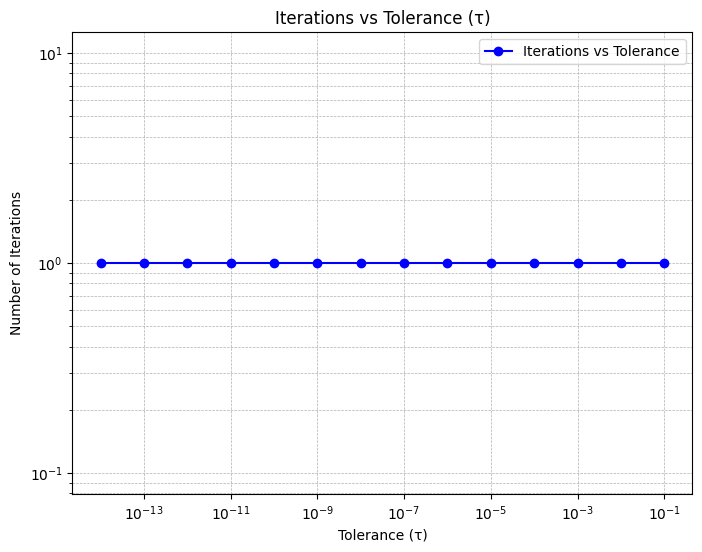

In [74]:
x_range = np.arange(-70,70,0.1)
y_range = np.arange(-70,70,0.1)

X,Y = np.meshgrid(x_range,y_range)

Z = f(X,Y)

x_start , y_start = 36 , -49

x_dash ,y_dash ,f_dash ,history = gradient_descent(x_start , y_start )


In [75]:
print(f_dash)
print("Minimiser in x = ", x_dash)
print("Minimiser in y = ", y_dash)

0.0
Minimiser in x =  -49.0
Minimiser in y =  36.0


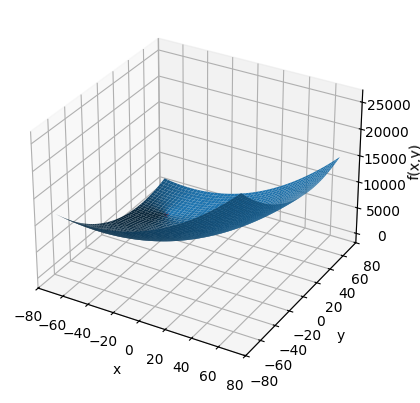

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)
ax.scatter(*zip(*history), c='r', marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()
